In [2]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./Rrod_tolerance_4rod.csv','r')
rdr = csv.reader(file)
rod39 = [[],[],[],[],[]]
rod40 = [[],[],[],[],[]]
rod41 = [[],[],[],[],[]]

for line in rdr:
    #print(line[3])
    if (float(line[4])>0.715 and float(line[2])>1.55 ):
        #final frequency condition is to compare only the common frequencies
        if (int(line[1]) == 20):
            rod41[0].append(float(line[2]))
            rod41[1].append(float(line[4]))
            rod41[2].append(float(line[-2]))
            rod41[3].append(float(line[-1]))
            rod41[4].append(float(line[0]))
        elif (int(line[1]) == 18):
            rod39[0].append(float(line[2]))
            rod39[1].append(float(line[4]))
            rod39[2].append(float(line[-2]))
            rod39[3].append(float(line[-1]))        
            rod39[4].append(float(line[0]))
        elif (int(line[1]) == 19):
            rod40[0].append(float(line[2]))
            rod40[1].append(float(line[4]))
            rod40[2].append(float(line[-2]))
            rod40[3].append(float(line[-1]))
            rod40[4].append(float(line[0]))
file.close()

for i in range(0,5):
    rod39[i].reverse()
    rod40[i].reverse()
    rod41[i].reverse()
Rod39 = np.array(rod39)
Rod40 = np.array(rod40)
Rod41 = np.array(rod41)
#print(Rod39[0],Rod39[4])


[0.006000672458305822, 0.005913830143460808, 0.0061175794999651645, 0.0047259271005278825, 0.0033216129142314976, 0.002387530929777837, 0.0011455863611509187, 0, 0, 0, 0, 0, 0.0005652212973469295, 0.0016929042325669608, 0.002564430675629281, 0.0027091564436638738, 0.003409797053598229, 0.004655422280552379, 0.004687116419509807, 0.004805423306389334, 0.005151733512472778, 0.005248760871449432, 0.005470807482119477, 0.005864411627426458, 0.0060820325968480304, 0.006718460063739995, 0.007455794663418502, 0.007844697891009167, 0.00826193142052467, 0.007303876234834528]
[0.009583748467666076, 0.0095447052012968, 0.008841493871174388, 0.009374700217043341, 0.008021166770065147, 0.007214056157480941, 0.0064805076359348845, 0.005708332400124583, 0.004684488440452328, 0.0032700044936638806, 0.0022987122910438362, 0.0034209518172362285, 0.004279614586086056, 0.004704319500498655, 0.005061450400199896, 0.005843071731425509, 0.005713642098657434, 0.004728955922787215, 0.004698140126350281, 0.0043

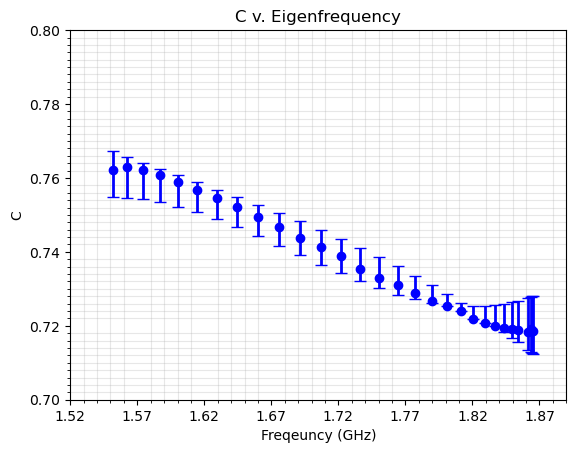

In [3]:
def func_3(x,a,b,c,d):
    return a*np.power(x,3)+b*np.power(x,2)+c*np.power(x,1)+d
def func_2(x,a,b,c):
    return a*np.power(x,2)+b*np.power(x,1)+c

x_39, x_40, x_41 = Rod39[0], Rod40[0], Rod41[0]
y1_39, y1_40, y1_41 = Rod39[1], Rod40[1], Rod41[1]

freq_range = np.linspace(1.5,1.9,400)
#plt.plot(x_39,y1_39,'ro')
#plt.plot(x_40,y1_40,'bo')
#plt.plot(x_41,y1_41,'go')
popt_39, pcov_39 = curve_fit(func_3,x_39,y1_39)
#plt.plot(freq_range,func_3(freq_range,*popt_39),'r-', label = 'Rrod = 39 mm')
popt_40, pcov_40 = curve_fit(func_3,x_40,y1_40)
#plt.plot(freq_range,func_3(freq_range,*popt_40),'b-', label = 'Rrod = 40 mm')
popt_41, pcov_41 = curve_fit(func_3,x_41,y1_41)
#plt.plot(freq_range,func_3(freq_range,*popt_41),'g-', label = 'Rrod = 41 mm')

y_39error = func_3(x_40,*popt_39)-y1_40
y_41error = func_3(x_40,*popt_41)-y1_40

y_nerror = [0 for i in range(len(x_40))]
y_perror = [0 for i in range(len(x_40))]
for i in range(len(x_40)):
    if y_39error[i] < 0 and y_41error[i] < 0:
        if y_39error[i] < y_41error[i]:
            y_nerror[i] = abs(y_39error[i])
        else:
            y_nerror[i] = abs(y_41error[i])
    elif y_39error[i] >0 and y_41error[i] >0:
        if y_39error[i] < y_41error[i]:
            y_perror[i] = y_41error[i]
        else:
            y_perror[i] = y_39error[i]
    elif y_39error[i]>0 and y_41error[i] <0:
        y_perror[i] = y_39error[i]
        y_nerror[i] = abs(y_41error[i])
    else:
        y_perror[i] = y_41error[i]
        y_nerror[i] = abs(y_39error[i])
yerr = [tuple(y_nerror),tuple(y_perror)]
print(y_nerror)
print(y_perror)
plt.errorbar(x_40,y1_40,yerr=yerr,capsize = 4,ls='none',fmt='bo',elinewidth=2)
plt.xlabel('Freqeuncy (GHz)')
plt.ylabel('C')
plt.title("C v. Eigenfrequency")
plt.xticks(np.arange(1.52,1.9,0.05))
plt.yticks(np.arange(0.7,0.8,0.02))
plt.xticks(np.arange(1.52,1.9,0.01),minor=True)
plt.yticks(np.arange(0.70,0.80,0.002),minor=True)
plt.grid(which="minor",alpha=0.3)
plt.grid(which="major",alpha=0.7)


#plt.legend()
plt.grid()
plt.show()

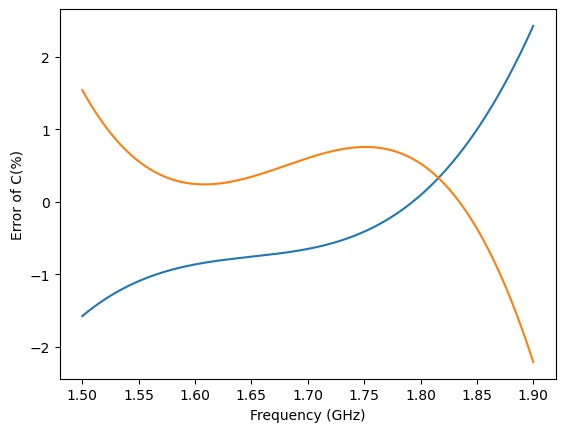

In [4]:
popt_39and40 = (popt_39-popt_40)
popt_41and40 = (popt_41-popt_40)
m = func_3(freq_range,*popt_39and40)/func_3(freq_range,*popt_40)*100
n = func_3(freq_range,*popt_41and40)/func_3(freq_range,*popt_40)*100
plt.plot(freq_range,m)
plt.plot(freq_range,n)
plt.xlabel("Frequency (GHz)")
plt.ylabel("Error of C(%)")
plt.show()

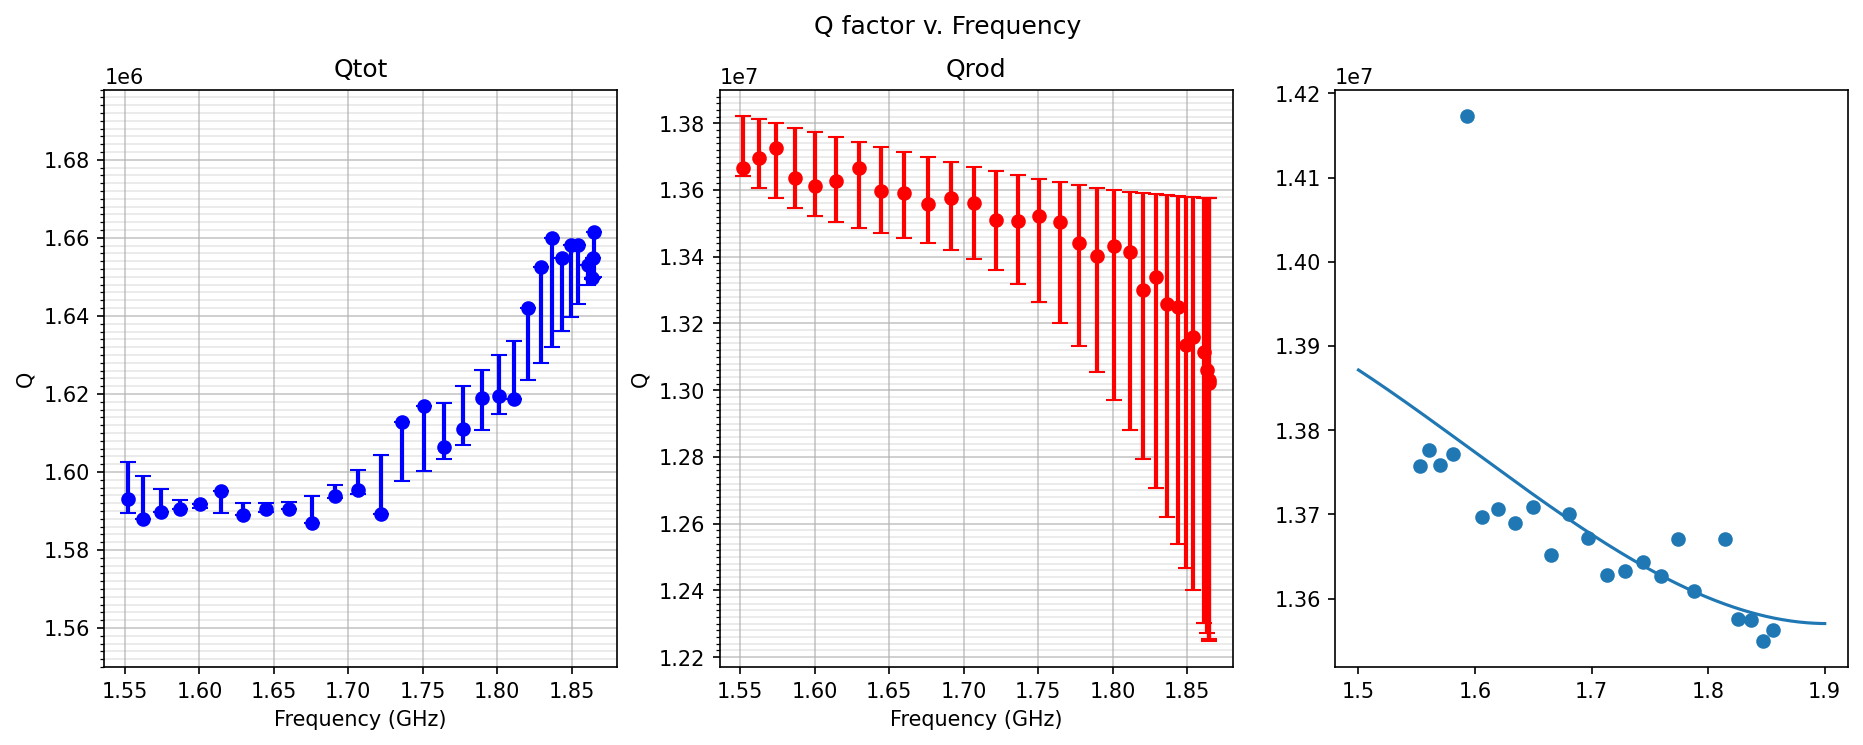

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
fig.suptitle("Q factor v. Frequency")


y2_39, y2_40, y2_41 = Rod39[2], Rod40[2], Rod41[2]
y3_39, y3_40, y3_41 = Rod39[3], Rod40[3], Rod41[3]

Qtot_opt_39, Qtot_cov_39 = curve_fit(func_3,x_39,y2_39)
Qrod_opt_39, Qrod_cov_39 = curve_fit(func_3,x_39,y3_39)

#plt.plot(x_39,y2_39,'ro')
#plt.plot(x_39,y3_39,marker='o',color='C1',linestyle = 'none')
#plt.plot(freq_range,func_3(freq_range,*Qtot_opt_39),'r-',label = 'Qtot_R=39mm')


Qtot_opt_40, Qtot_cov_40 = curve_fit(func_3,x_40,y2_40)

Qrod_opt_40, Qrod_cov_40 = curve_fit(func_3,x_40,y3_40)

#plt.plot(x_40,y2_40,'bo')
#plt.plot(x_40,y3_40,marker='o',color='C0',linestyle = 'none')
#plt.plot(freq_range,func_3(freq_range,*Qtot_opt_40),'b-', label = 'Qtot_R=40mm')

Qtot_opt_41, Qtot_cov_41 = curve_fit(func_3,x_41,y2_41)

Qrod_opt_41, Qrod_cov_41 = curve_fit(func_3,x_41,y3_41)

#plt.plot(x_41,y2_41,'go')
#plt.plot(x_41,y3_41,marker='o',color='C2',linestyle = 'none')
#plt.plot(freq_range,func_3(freq_range,*Qtot_opt_41),'g-', label = 'Qtot_R=41mm')

y2_39error = func_3(x_40,*Qtot_opt_39)-y2_40
y2_41error = func_3(x_40,*Qtot_opt_41)-y2_40

y3_39error = func_3(x_40,*Qrod_opt_39)-y3_40
y3_41error = func_3(x_40,*Qrod_opt_41)-y3_40

y2_nerror = [0 for i in range(len(x_40))]
y2_perror = [0 for i in range(len(x_40))]
y3_nerror = [0 for i in range(len(x_40))]
y3_perror = [0 for i in range(len(x_40))]

for i in range(len(x_40)):
    if y2_39error[i] < 0 and y2_41error[i] < 0:
        if y2_39error[i] < y2_41error[i]:
            y2_nerror[i] = abs(y2_39error[i])
        else:
            y2_nerror[i] = abs(y2_41error[i])
    elif y2_39error[i] >0 and y2_41error[i] >0:
        if y2_39error[i] < y2_41error[i]:
            y2_perror[i] = y2_41error[i]
        else:
            y2_perror[i] = y2_39error[i]
    elif y2_39error[i]>0 and y2_41error[i] <0:
        y2_perror[i] = y2_39error[i]
        y2_nerror[i] = abs(y2_41error[i])
    else:
        y2_perror[i] = y2_41error[i]
        y2_nerror[i] = abs(y2_39error[i])
y2_err = [tuple(y2_nerror),tuple(y2_perror)]
axs[0].errorbar(x_40,y2_40,y2_err,capsize = 4,ls='none',fmt = 'bo',elinewidth = 2)
#axs[0].grid()
axs[0].set_xlabel('Frequency (GHz)')
axs[0].set_ylabel('Q')
axs[0].set_title("Qtot")

for i in range(len(x_40)):
    if y3_39error[i] < 0 and y3_41error[i] < 0:
        if y3_39error[i] < y3_41error[i]:
            y3_nerror[i] = abs(y3_39error[i])
        else:
            y3_nerror[i] = abs(y3_41error[i])
    elif y3_39error[i] >0 and y3_41error[i] >0:
        if y3_39error[i] < y3_41error[i]:
            y3_perror[i] = y3_41error[i]
        else:
            y3_perror[i] = y3_39error[i]
    elif y3_39error[i]>0 and y3_41error[i] <0:
        y3_perror[i] = y3_39error[i]
        y3_nerror[i] = abs(y3_41error[i])
    else:
        y3_perror[i] = y3_41error[i]
        y3_nerror[i] = abs(y3_39error[i])
y3_err = [tuple(y3_nerror),tuple(y3_perror)]
axs[1].errorbar(x_40,y3_40,y3_err,capsize = 4, ls= 'none', fmt = 'ro', elinewidth = 2)
#axs[1].grid()
axs[1].set_xlabel('Frequency (GHz)')
axs[1].set_ylabel('Q')
axs[1].set_title('Qrod')

axs[0].set_xticks(np.arange(1.55,1.90,0.05))
axs[0].set_yticks(np.arange(1.55e6,1.70e6,0.002e6),minor=True)
axs[0].grid(which="minor",alpha=0.3)
axs[0].grid(which="major",alpha=0.7)

axs[1].set_xticks(np.arange(1.55,1.90,0.05))
axs[1].set_yticks(np.arange(1.22e7,1.39e7,0.002e7),minor=True)
axs[1].grid(which="minor",alpha=0.3)
axs[1].grid(which="major",alpha=0.7)



#plt.plot(freq_range,func_3(freq_range,*Qrod_opt_39),linestyle = '-', color = 'C1', label = 'Qrod_R=39mm')
axs[2].plot(x_41,y3_41,'o')
axs[2].plot(freq_range,func_3(freq_range,*Qrod_opt_41),linestyle = '-', color = 'C0', label = 'Qrod_R=40mm')
#plt.plot(freq_range,func_3(freq_range,*Qrod_opt_41),linestyle = '-', color = 'C2', label = 'Qrod_R=41mm')


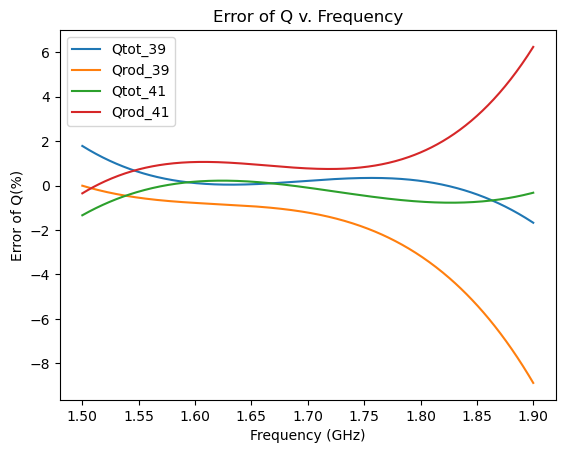

In [15]:
Qtot_opt_39and40 = (Qtot_opt_39-Qtot_opt_40)
Qtot_opt_41and40 = (Qtot_opt_41-Qtot_opt_40)
Qrod_opt_39and40 = (Qrod_opt_39-Qrod_opt_40)
Qrod_opt_41and40 = (Qrod_opt_41-Qrod_opt_40)
p1 = func_3(freq_range,*Qtot_opt_39and40)/func_3(freq_range,*Qtot_opt_40)*100
q1 = func_3(freq_range,*Qtot_opt_41and40)/func_3(freq_range,*Qtot_opt_40)*100
p2 = func_3(freq_range,*Qrod_opt_39and40)/func_3(freq_range,*Qrod_opt_40)*100
q2 = func_3(freq_range,*Qrod_opt_41and40)/func_3(freq_range,*Qrod_opt_40)*100
plt.plot(freq_range,p1,label="Qtot_39")
plt.plot(freq_range,p2,label="Qrod_39")
plt.plot(freq_range,q1,label="Qtot_41")
plt.plot(freq_range,q2,label="Qrod_41")
plt.xlabel("Frequency (GHz)")
plt.ylabel("Error of Q(%)")
plt.legend()
plt.title("Error of Q v. Frequency")
plt.show()

Code blocks below provide Angle v. Eigenfrequency for each value of Variable (which is Rrod for now), and difference of it based on the desired result (Rrod = 40 mm)

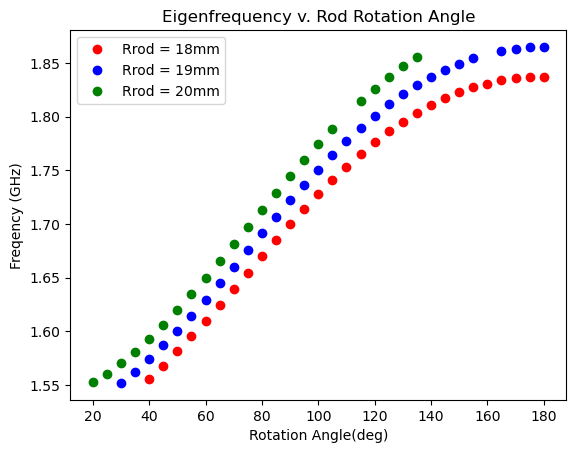

In [ ]:
angle_39, angle_40, angle_41 = Rod39[-1], Rod40[-1], Rod41[-1]
plt.plot(angle_39,x_39,'ro',label="Rrod = 18mm")
plt.plot(angle_40,x_40,'bo',label="Rrod = 19mm")
plt.plot(angle_41,x_41,'go',label="Rrod = 20mm")
plt.xlabel("Rotation Angle(deg)")
plt.ylabel("Freqency (GHz)")
plt.title("Eigenfrequency v. Rod Rotation Angle")
plt.legend()
plt.show()

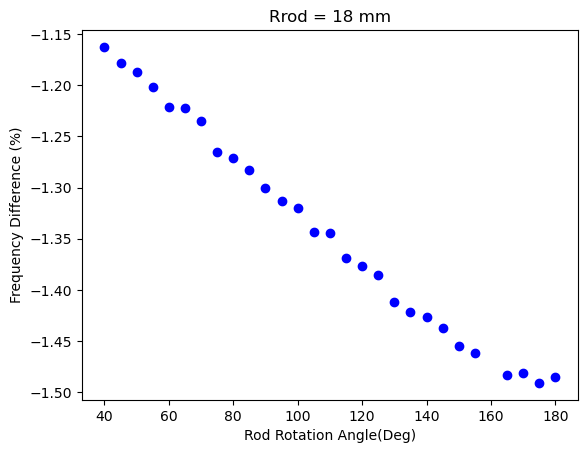

Text(0.5, 1.0, 'Rrod = 20 mm')

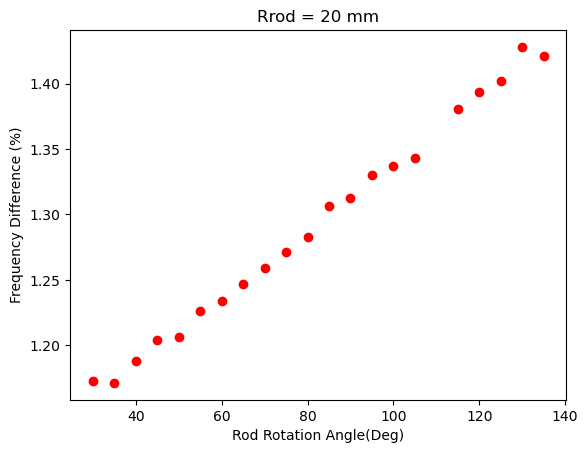

In [ ]:
err39 = [[],[]]
for angle40 in Rod40[-1]:
    for angle39 in Rod39[-1]:
        if int(angle40) == int(angle39):
            freq39 = Rod39[0][np.where(Rod39[-1]==angle39)]
            freq40_1= Rod40[0][np.where(Rod40[-1]==angle40)]
            #print(angle40,freq39,freq40_1)

            err = (freq39-freq40_1)/freq40_1*100
            err39[0].append(angle40)
            err39[1].append(err)
plt.plot(err39[0],err39[1],'bo')
plt.xlabel("Rod Rotation Angle(Deg)")
plt.ylabel("Frequency Difference (%)")
plt.title("Rrod = 18 mm")
plt.show()
err41 = [[],[]]
for angle40 in Rod40[-1]:
    for angle41 in Rod41[-1]:
        if int(angle40) == int(angle41):
            freq41 = Rod41[0][np.where(Rod41[-1]==angle41)]
            freq40_2 = Rod40[0][np.where(Rod40[-1]==angle40)]
            #print(angle40,freq41,freq40_2)

            err = (freq41-freq40_2)/freq40_2*100
            err41[0].append(angle40)
            err41[1].append(err)
plt.plot(err41[0],err41[1],'ro')
plt.xlabel("Rod Rotation Angle(Deg)")
plt.ylabel("Frequency Difference (%)")
plt.title("Rrod = 20 mm")

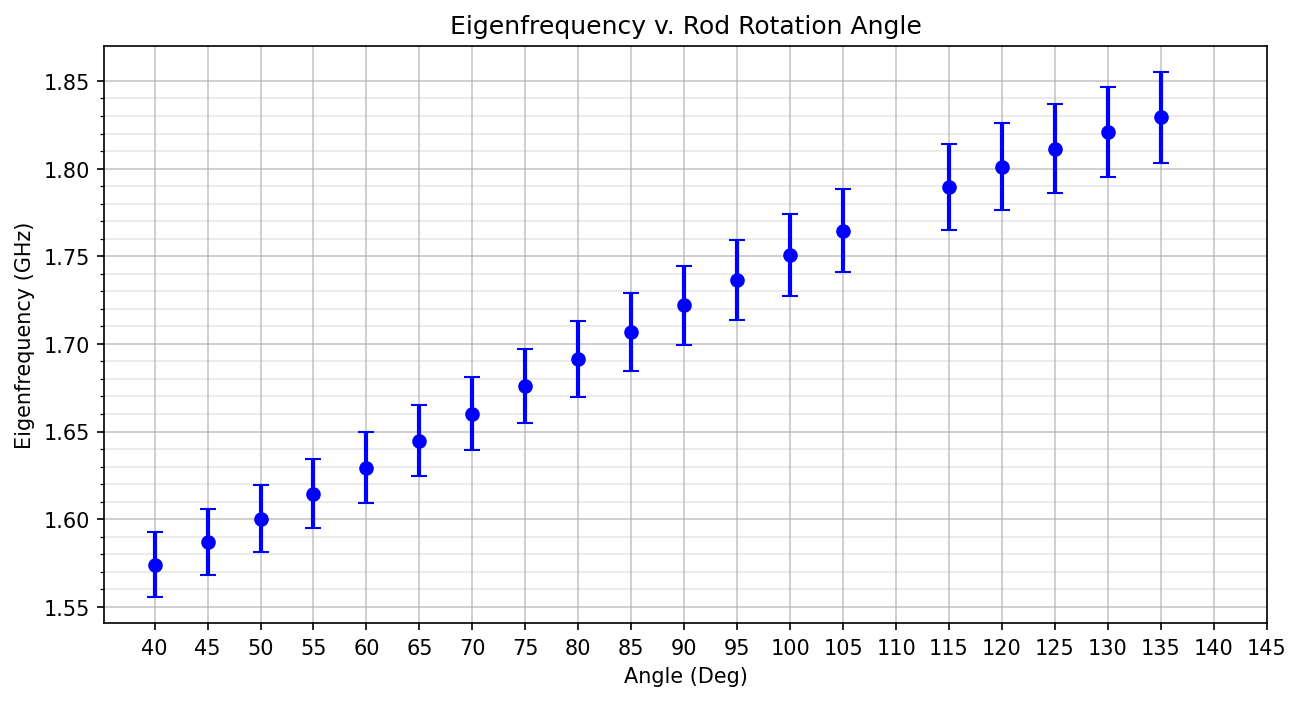

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(10,5), dpi= 150)
angle_range = []
frequency_range = []
freq_perror = []
freq_nerror = []
for angle40 in Rod40[-1]:
    if angle40 in Rod39[-1] and angle40 in Rod41[-1]:
        freq40 = Rod40[0][np.where(Rod40[-1]==angle40)][0]
        frequency_range.append(freq40)
        angle_range.append(angle40)
        freq39 = Rod39[0][np.where(Rod39[-1]==angle40)][0]
        freq41 = Rod41[0][np.where(Rod41[-1]==angle40)][0]
        err39 = freq39-freq40
        err41 = freq41-freq40
        if err39<0 and err41<0:
            if err39<err41:
                freq_nerror.append(abs(err39))
            else:
                freq_nerror.append(abs(err41))
            freq_perror.append(0)
        elif err39<0 and err41>0:
            freq_nerror.append(abs(err39))
            freq_perror.append(err41)
        elif err39>0 and err41<0:
            freq_nerror.append(abs(err41))
            freq_perror.append(err39)
        else:
            if err39<err41:
                freq_perror.append(err41)
            else:
                freq_perror.append(err39)
            freq_nerror.append(0)
freq_error = [tuple(freq_nerror),tuple(freq_perror)]
axs.errorbar(angle_range,frequency_range,freq_error,capsize = 4,ls='none',fmt = 'bo',elinewidth=2)
axs.set_xticks(np.arange(40,150,5))
axs.set_yticks(np.arange(1.55,1.85,0.01),minor=True)
axs.grid(which="minor",alpha=0.3)
axs.grid(which="major",alpha=0.7)

axs.set_title("Eigenfrequency v. Rod Rotation Angle")
axs.set_xlabel("Angle (Deg)")
axs.set_ylabel("Eigenfrequency (GHz)")


        